In [1]:
# Importation des librairies
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk
import scipy as sc
import re
import statsmodels.formula.api as smf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Chargement des données
data = pd.read_csv("fr.openfoodfacts.org.products.csv",sep="\t", low_memory=False)

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Aperçu rapide des extrémités
data.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensions du dataset
nb_lignes, nb_colonnes = data.shape
print(f"Nombre de lignes : {nb_lignes}")
print(f"Nombre de colonnes : {nb_colonnes}")

Nombre de lignes : 320772
Nombre de colonnes : 162


In [6]:
# Aperçu général du contenu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [7]:
# Statistiques globales
data.describe(include="all")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
unique,320749,320749,3535,189567,189568,180495,180495,221347,38584,13826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489055829,2017-03-09T16:32:00Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,169868,20,20,33,33,410,201,4669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

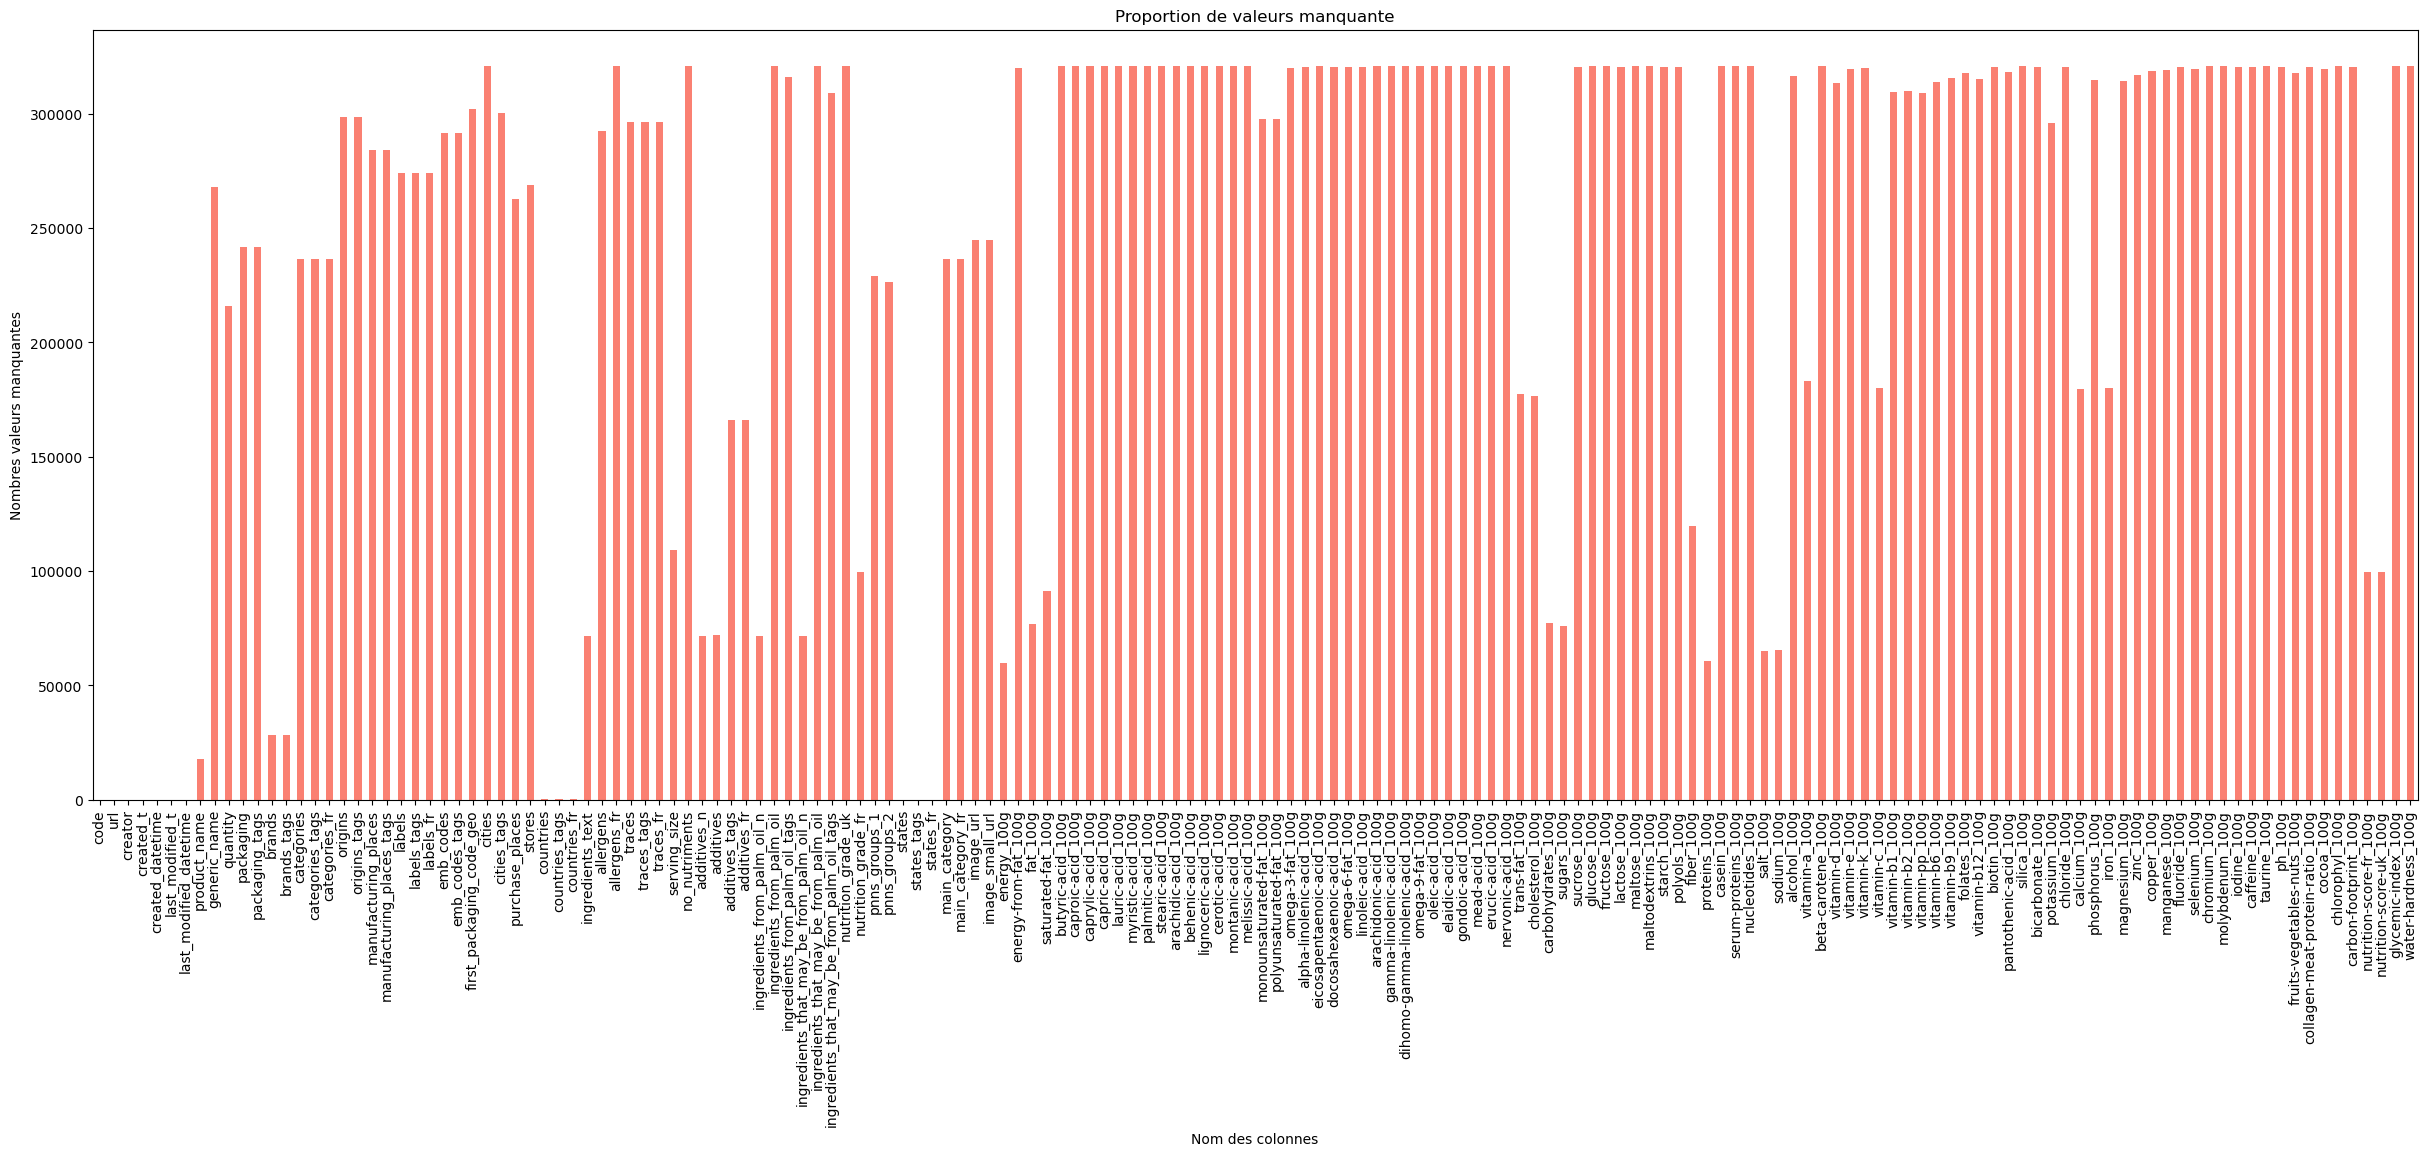

In [8]:
# Vue graphique des valeurs null par colonne
valeur_manquante = data.isnull().sum()

plt.figure(figsize=(30, 10))
valeur_manquante.plot(kind="bar", color="salmon")

plt.title("Proportion de valeurs manquante")
plt.xlabel("Nom des colonnes")
plt.xticks(rotation = 90)
plt.ylabel("Nombres valeurs manquantes")

plt.show

In [9]:
# Classification des variables

# Identification des colonnes quantitatives et qualitatives
colonnes_quantitatives = [col for col in data.select_dtypes(include=["int64", "float64"]).columns if data[col].nunique() >= 10]
colonnes_qualitatives = data.select_dtypes(include=["object", "category"]).columns.tolist() + [col for col in data.select_dtypes(include=["int64", "float64"]).columns if data[col].nunique() < 10]

# Vérification des doublons entre les deux listes
colonnes_quantitatives_set = set(colonnes_quantitatives)
colonnes_qualitatives_set = set(colonnes_qualitatives)
doublons = colonnes_quantitatives_set.intersection(colonnes_qualitatives_set)

# Nombre de colonnes dans le DataFrame
colonnes_totales = set(data.columns)

# Résultats
print(f"\nColonnes quantitatives ({len(colonnes_quantitatives)}):\n" + "\n".join(colonnes_quantitatives))
print(f"\nColonnes qualitatives ({len(colonnes_qualitatives)}):\n" + "\n".join(colonnes_qualitatives))

print(f"\nDoublons entre quantitatives et qualitatives : {len(doublons)}")
print(f"\nColonnes totales : {len(colonnes_totales)}")
print(f"Colonnes non classifiées : {len(colonnes_totales - colonnes_quantitatives_set - colonnes_qualitatives_set)}")


Colonnes quantitatives (75):
additives_n
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
arachidic-acid_100g
behenic-acid_100g
monounsaturated-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
alpha-linolenic-acid_100g
eicosapentaenoic-acid_100g
docosahexaenoic-acid_100g
omega-6-fat_100g
linoleic-acid_100g
gamma-linolenic-acid_100g
dihomo-gamma-linolenic-acid_100g
omega-9-fat_100g
oleic-acid_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
sucrose_100g
glucose_100g
fructose_100g
lactose_100g
maltodextrins_100g
starch_100g
polyols_100g
fiber_100g
proteins_100g
casein_100g
serum-proteins_100g
salt_100g
sodium_100g
alcohol_100g
vitamin-a_100g
beta-carotene_100g
vitamin-d_100g
vitamin-e_100g
vitamin-k_100g
vitamin-c_100g
vitamin-b1_100g
vitamin-b2_100g
vitamin-pp_100g
vitamin-b6_100g
vitamin-b9_100g
folates_100g
vitamin-b12_100g
biotin_100g
pantothenic-acid_100g
silica_100g
bicarbonate_100g
potassium_100g
chloride_100g
calcium_100g
phosphorus_100g
iron_100

création de deux listes : une pour les variables quantitatives (avec suffisamment de diversité), une autre pour les qualitatives.

j'exclus les variables numériques avec moins de 10 modalités, que je classes comme qualitatives.

Cela est fondamental pour :

les visualisations (boxplot pour quantitatives, barplot pour qualitatives),

le traitement ultérieur (ANOVA, corrélations, encoding…).

In [10]:
# Quantification des valeurs manquantes (par colonne)

# Nombre total de lignes
nb_null = data.shape[0]

# Liste vide pour le stockage des informations sur les valeurs manquantes
val_null = []

# Lecture de toutes les colonnes du DataFrame
for col in data.columns:
    col_null = data[col].isnull().sum()
    pourcentage = round(col_null / nb_null * 100, 2)
    val_null.append((col, col_null, pourcentage))

# Tri du résultats par pourcentage décroissant
val_null.sort(key=lambda x: x[2], reverse=True)

# Affichage des résultats triés
for col, col_null, pourcentage in val_null:
    print(f"Il manque {col_null} valeurs, soit {pourcentage} % dans la colonne {col}")

Il manque 320772 valeurs, soit 100.0 % dans la colonne no_nutriments
Il manque 320772 valeurs, soit 100.0 % dans la colonne ingredients_from_palm_oil
Il manque 320772 valeurs, soit 100.0 % dans la colonne ingredients_that_may_be_from_palm_oil
Il manque 320772 valeurs, soit 100.0 % dans la colonne nutrition_grade_uk
Il manque 320772 valeurs, soit 100.0 % dans la colonne butyric-acid_100g
Il manque 320772 valeurs, soit 100.0 % dans la colonne caproic-acid_100g
Il manque 320771 valeurs, soit 100.0 % dans la colonne caprylic-acid_100g
Il manque 320770 valeurs, soit 100.0 % dans la colonne capric-acid_100g
Il manque 320768 valeurs, soit 100.0 % dans la colonne lauric-acid_100g
Il manque 320771 valeurs, soit 100.0 % dans la colonne myristic-acid_100g
Il manque 320771 valeurs, soit 100.0 % dans la colonne palmitic-acid_100g
Il manque 320771 valeurs, soit 100.0 % dans la colonne stearic-acid_100g
Il manque 320772 valeurs, soit 100.0 % dans la colonne lignoceric-acid_100g
Il manque 320772 valeu

je calcule pour chaque colonne combien de valeurs sont manquantes, et le pourcentage que cela représente.

En les triant du plus élevé au plus faible, j' obtiens une priorisation claire des colonnes problématiques.

---------Etape 1 : Nettoyez et filtrez des features et produits----------

In [11]:
# Listez l'ensemble des features du fichier

# Identification des colonnes quantitatives et qualitatives
quantitatives = [col for col in data.select_dtypes(include=["number"]).columns if data[col].nunique() >= 10]
qualitatives = data.select_dtypes(exclude=["number"]).columns.tolist() + \
            [col for col in data.select_dtypes(include=["number"]).columns if data[col].nunique() < 10]

# Conversion en ensembles et calcul des doublons
quant_set, qual_set = set(quantitatives), set(qualitatives)
doublons = quant_set.intersection(qual_set)

# Nombre total de lignes
nb_lignes = data.shape[0]

# Informations sur les valeurs manquantes
val_null = {col: (data[col].isnull().sum(), round(data[col].isnull().sum() / nb_lignes * 100, 2)) for col in data.columns}

# Résultats
print(f"\nColonnes quantitatives ({len(quantitatives)}):")
for col in quantitatives:
    col_null, pourcentage = val_null.get(col, (0, 0))
    print(f"{col} - {col_null} valeurs manquantes, cela correspond à ({pourcentage}%) du dataset")

print(f"\nColonnes qualitatives ({len(qualitatives)}):")
for col in qualitatives:
    col_null, pourcentage = val_null.get(col, (0, 0))
    print(f"{col} - {col_null} valeurs manquantes, cela correspond à ({pourcentage}%) du dataset")

print(f"\nDoublons entre quantitatives et qualitatives : {len(doublons)}")
print(f"Doublons : {', '.join(doublons)}")

total_cols = set(data.columns)
print(f"\nColonnes totales : {len(total_cols)}")
print(f"Colonnes non classifiées : {len(total_cols - quant_set - qual_set)}")


Colonnes quantitatives (75):
additives_n - 71833 valeurs manquantes, cela correspond à (22.39%) du dataset
energy_100g - 59659 valeurs manquantes, cela correspond à (18.6%) du dataset
energy-from-fat_100g - 319915 valeurs manquantes, cela correspond à (99.73%) du dataset
fat_100g - 76881 valeurs manquantes, cela correspond à (23.97%) du dataset
saturated-fat_100g - 91218 valeurs manquantes, cela correspond à (28.44%) du dataset
arachidic-acid_100g - 320748 valeurs manquantes, cela correspond à (99.99%) du dataset
behenic-acid_100g - 320749 valeurs manquantes, cela correspond à (99.99%) du dataset
monounsaturated-fat_100g - 297949 valeurs manquantes, cela correspond à (92.88%) du dataset
polyunsaturated-fat_100g - 297913 valeurs manquantes, cela correspond à (92.87%) du dataset
omega-3-fat_100g - 319931 valeurs manquantes, cela correspond à (99.74%) du dataset
alpha-linolenic-acid_100g - 320586 valeurs manquantes, cela correspond à (99.94%) du dataset
eicosapentaenoic-acid_100g - 32073

# Choix de la cible:


(quant) calcium_100g - 179722 valeurs manquantes, cela correspond à (56.03%) du dataset

 Ou

(qual) additives_fr - 166092 valeurs manquantes, cela correspond à (51.78%) du dataset

In [12]:
# Suppression des lignes sans 'calcium_100g'

# target_c = data.dropna(subset=["calcium_100g"], axis=0)
data = data.dropna(subset=["calcium_100g"], axis=0)

 Objectif : Construire un modèle capable de prédire le taux de calcium d’un produit à partir d’autres variables.
j'ai donc supprimé les lignes où la valeur cible est absente.

Pourquoi calcium ?
C’est une variable quantitative continue, pertinente pour la santé, avec un taux de remplissage pas trop faible (~43% dans le dataset brut, plus après nettoyage).

In [13]:
# Taux de remplissage des colonnes restantes

# Affichez les taux de remplissage des features du dataset
taux_remplissage = data.notnull().mean() * 100
print("Taux de remplissage des features :")
print(taux_remplissage)

Taux de remplissage des features :
code                       100.000000
url                        100.000000
creator                    100.000000
created_t                  100.000000
created_datetime           100.000000
                              ...    
carbon-footprint_100g        0.001418
nutrition-score-fr_100g     95.980149
nutrition-score-uk_100g     95.980149
glycemic-index_100g          0.000000
water-hardness_100g          0.000000
Length: 162, dtype: float64


Pour sélectionner des features fiables (avec >50 % de valeurs remplies) qui peuvent servir à expliquer ou prédire la variable cible.

In [14]:
# Sélection de variables pertinentes

# Sélectionnez des features qui sont assez remplis (plus que 50%) et qui vous paraissent intéressantes pour effectuer la prédiction de votre cible.
features_bien_remplies = taux_remplissage[taux_remplissage > 50].index
X_selected = data[features_bien_remplies]

cela permet de travailler avec un jeu de données plus propre, avec suffisamment d'information dans chaque colonne.

-------Automatisez la procédure-------

Première etape:

Identification des colonnes quantitatives et qualitatives : Nous déterminons quelles colonnes sont quantitatives (avec suffisamment de valeurs uniques) ou qualitatives.

Détection des doublons : Nous comparons les colonnes identifiées comme quantitatives et qualitatives pour trouver des chevauchements.

Calcul des valeurs manquantes : Pour chaque colonne, nous calculons le nombre de valeurs manquantes et leur pourcentage par rapport au nombre total de lignes.

Affichage des résultats : Nous affichons les colonnes quantitatives, qualitatives, et les doublons.

Sélection de la cible : Nous filtrons les données pour conserver uniquement les lignes où la cible est définie.

Sélection des features bien remplies : Nous sélectionnons les colonnes où plus de 50% des valeurs sont présentes.

Suppression des doublons : Nous supprimons les doublons dans les données sélectionnées.


In [15]:
# Création d’une fonction de nettoyage automatique

def analyse_dataset(data, cible="calcium_100g", seuil_remplissage=50):

    # 1. Identification des colonnes quantitatives et qualitatives
    def identifier_colonnes(data):
        quantitatives = [col for col in data.select_dtypes(include=["number"]).columns if data[col].nunique() >= 10]
        qualitatives = data.select_dtypes(exclude=["number"]).columns.tolist() + \
                    [col for col in data.select_dtypes(include=["number"]).columns if data[col].nunique() < 10]
        return quantitatives, qualitatives

    # 2. Conversion en ensembles et calcul des doublons
    def detecter_doublons(quantitatives, qualitatives):
        quant_set, qual_set = set(quantitatives), set(qualitatives)
        doublons = quant_set.intersection(qual_set)
        return doublons

    # 3. Calcul des valeurs manquantes
    def calculer_valeurs_manquantes(data):
        nb_lignes = data.shape[0]
        val_null = {col: (data[col].isnull().sum(), round(data[col].isnull().sum() / nb_lignes * 100, 2)) for col in data.columns}
        return val_null

    # 4. Afficher les résultats
    def afficher_resultats(quantitatives, qualitatives, val_null, doublons, total_cols):
        print(f"\nColonnes quantitatives ({len(quantitatives)}):")
        for col in quantitatives:
            col_null, pourcentage = val_null.get(col, (0, 0))
            print(f"{col} - {col_null} valeurs manquantes, cela correspond à ({pourcentage}%) du dataset")

        print(f"\nColonnes qualitatives ({len(qualitatives)}):")
        for col in qualitatives:
            col_null, pourcentage = val_null.get(col, (0, 0))
            print(f"{col} - {col_null} valeurs manquantes, cela correspond à ({pourcentage}%) du dataset")

        print(f"\nDoublons entre quantitatives et qualitatives : {len(doublons)}")
        print(f"Doublons : {', '.join(doublons)}")

        print(f"\nColonnes totales : {len(total_cols)}")
        print(f"Colonnes non classifiées : {len(total_cols - set(quantitatives) - set(qualitatives))}")

    # 5. Sélection et préparation de la cible
    def selectionner_cible(data, cible):
        target_c = data.dropna(subset=[cible])
        X = target_c.drop(columns=[cible])
        y = target_c[cible]
        return X, y

    # 6. Calcul des taux de remplissage et sélection des features
    def selectionner_features_remplies(X, seuil):
        taux_remplissage = X.notnull().mean() * 100
        print("Taux de remplissage des features :")
        print(taux_remplissage)
        features_bien_remplies = taux_remplissage[taux_remplissage > seuil].index
        X_selected = X[features_bien_remplies]
        return X_selected

    # 7. Suppression des doublons
    def supprimer_doublons(X):
        return X.drop_duplicates()

    # Processus principal
    quantitatives, qualitatives = identifier_colonnes(data)
    doublons = detecter_doublons(quantitatives, qualitatives)
    val_null = calculer_valeurs_manquantes(data)
    total_cols = set(data.columns)

    afficher_resultats(quantitatives, qualitatives, val_null, doublons, total_cols)

    X, y = selectionner_cible(data, cible)
    X_selected = selectionner_features_remplies(X, seuil_remplissage)
    X_selected = supprimer_doublons(X_selected)
    y = y.loc[X_selected.index]

    return X_selected, y

# Exemple d'utilisation de la fonction avec un DataFrame `data`
X_selected, y = analyse_dataset(data, cible="calcium_100g", seuil_remplissage=50)


Colonnes quantitatives (62):
additives_n - 785 valeurs manquantes, cela correspond à (0.56%) du dataset
energy_100g - 467 valeurs manquantes, cela correspond à (0.33%) du dataset
energy-from-fat_100g - 140291 valeurs manquantes, cela correspond à (99.46%) du dataset
fat_100g - 429 valeurs manquantes, cela correspond à (0.3%) du dataset
saturated-fat_100g - 3846 valeurs manquantes, cela correspond à (2.73%) du dataset
monounsaturated-fat_100g - 122956 valeurs manquantes, cela correspond à (87.17%) du dataset
polyunsaturated-fat_100g - 122968 valeurs manquantes, cela correspond à (87.18%) du dataset
omega-3-fat_100g - 140959 valeurs manquantes, cela correspond à (99.94%) du dataset
alpha-linolenic-acid_100g - 140967 valeurs manquantes, cela correspond à (99.94%) du dataset
omega-6-fat_100g - 141022 valeurs manquantes, cela correspond à (99.98%) du dataset
linoleic-acid_100g - 140978 valeurs manquantes, cela correspond à (99.95%) du dataset
trans-fat_100g - 9165 valeurs manquantes, cela 

J'ai tout regroupé dans une fonction analyse_dataset(). Cette fonction est utile pour :

Réduire les répétitions de code.

Pouvoir appliquer le nettoyage sur d’autres cibles sans tout réécrire.

Structurer le code de manière professionnelle.

------Etape 2 : Identifiez et traitez les valeurs aberrantes-------

In [16]:
# Suppression des colonnes trop incomplètes

# Suppression des colonnes avec plus de 60% de valeurs manquantes
perc_null = data.isnull().mean() * 100

# Selection des colonnes à supprimer
colonne_supp_60 = perc_null[perc_null > 60].index

# Suppression des colonnes
data = data.drop(columns=colonne_supp_60)

Les colonnes avec > 60 % de valeurs manquantes contiennent trop peu d’informations utiles.

Leur présence complique inutilement le modèle.

j' allèges le dataset et améliores la qualité de l'apprentissage.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141050 entries, 1 to 320768
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     141050 non-null  object 
 1   url                                      141050 non-null  object 
 2   creator                                  141050 non-null  object 
 3   created_t                                141050 non-null  object 
 4   created_datetime                         141050 non-null  object 
 5   last_modified_t                          141050 non-null  object 
 6   last_modified_datetime                   141050 non-null  object 
 7   product_name                             140837 non-null  object 
 8   brands                                   140169 non-null  object 
 9   brands_tags                              140169 non-null  object 
 10  countries                            

<Axes: >

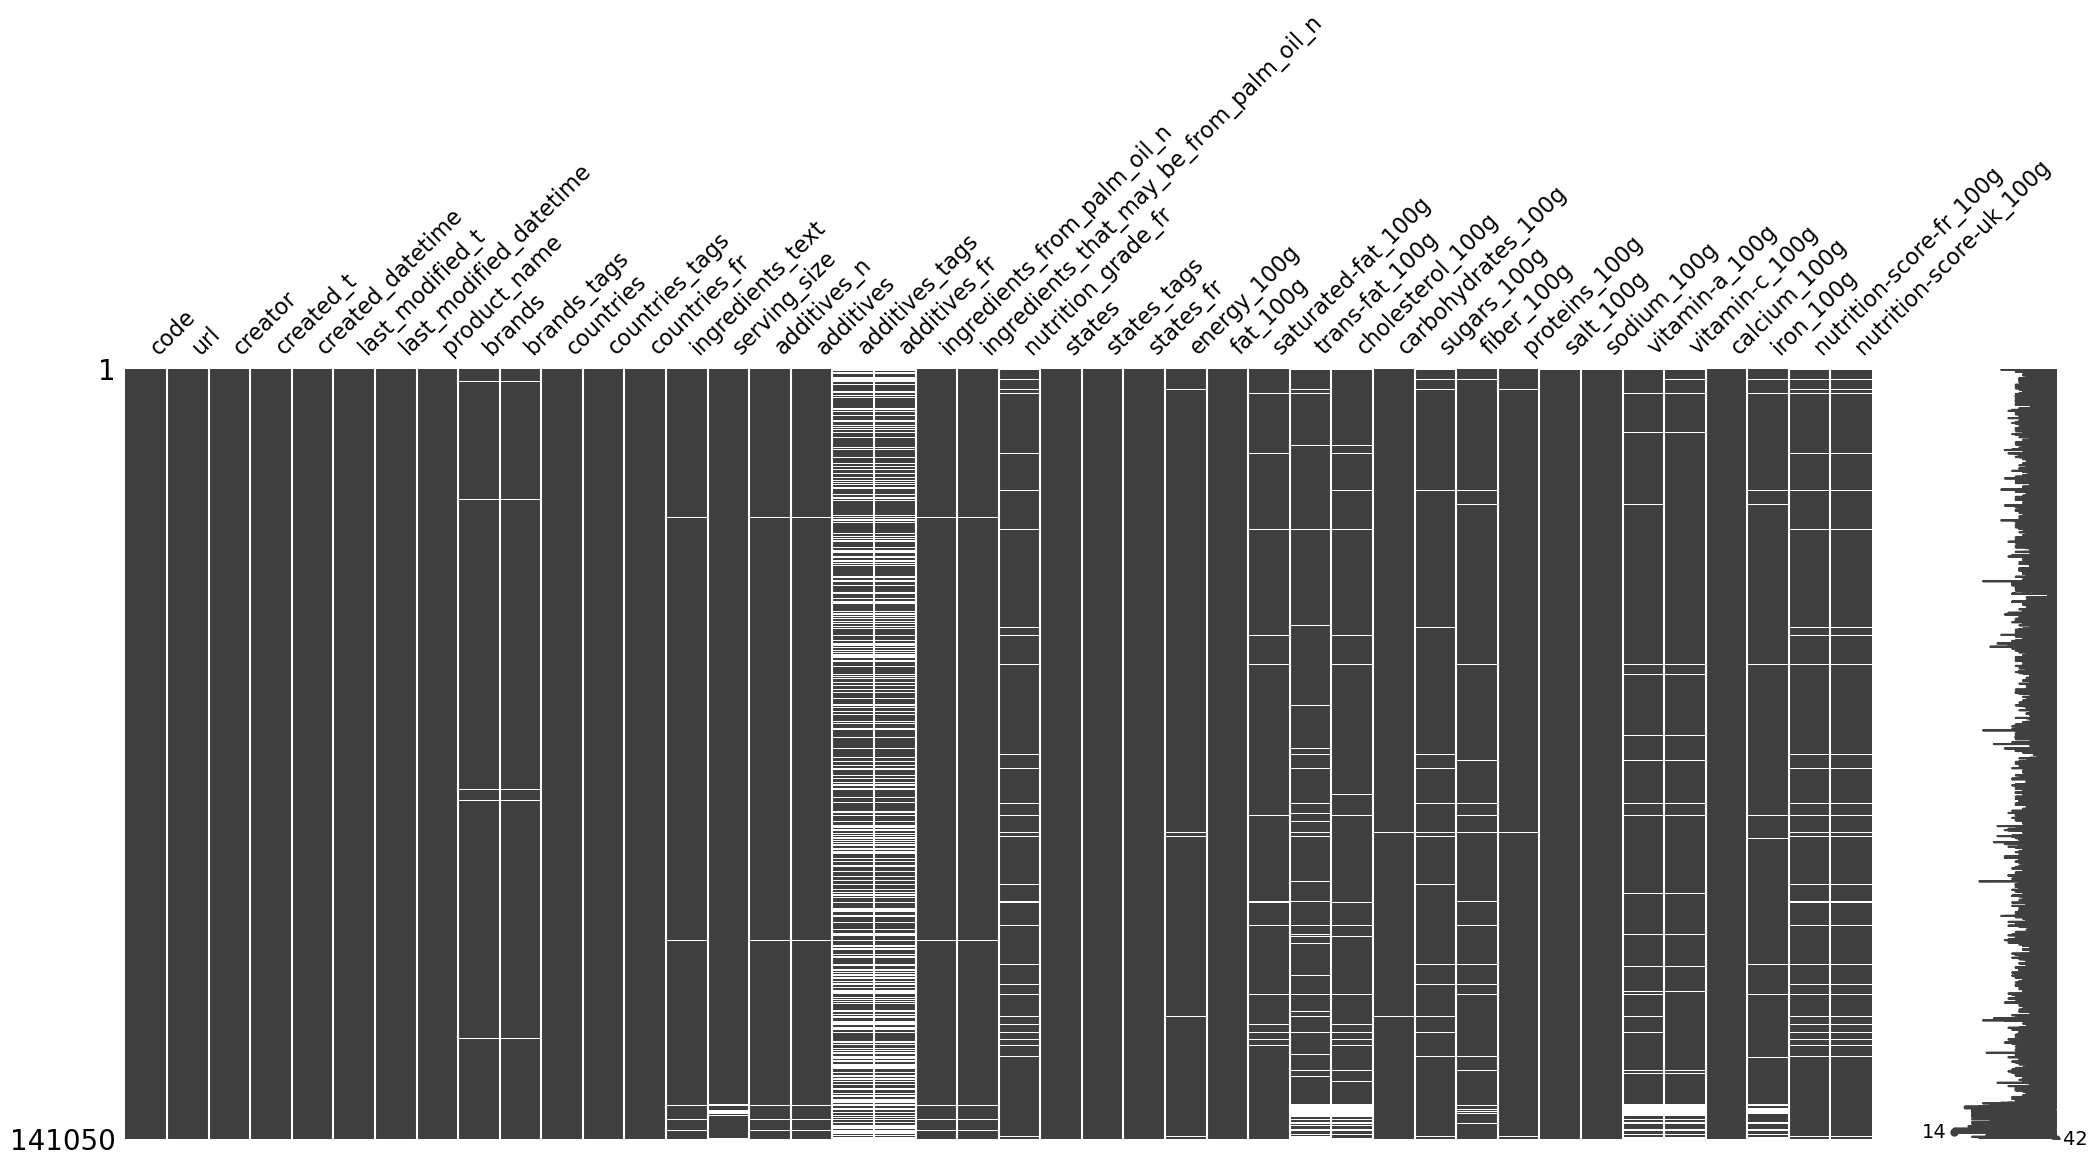

In [18]:
msno.matrix(data)

Chaque colonne représente une variable (colonne du DataFrame).

Chaque ligne représente une observation (ligne du DataFrame).

Les barres blanches verticales signalent des valeurs manquantes dans une colonne donnée.

Les zones noires indiquent la présence de données valides.

Le barplot à droite montre le nombre de valeurs non manquantes par colonne (plus la barre est haute, plus la colonne est complète).

-------------------------------------------------------------

Colonnes très complètes (quasi totalement noires) : code, url, creator, created_t, etc.

Colonnes avec beaucoup de valeurs manquantes :

ingredients_text

additives

vitamin-c_100g, iron_100g, vitamin-a_100g, etc. (micronutriments)

Colonnes partiellement manquantes :

fat_100g, sugars_100g, carbohydrates_100g ont des trous visibles mais raisonnables.

En bas à droite, le nombre total de lignes est 141050, et à droite, la variation du taux de complétude par variable est visible.

In [19]:
float_columns = data.select_dtypes(include=["float64"]).columns

# Remplacer les valeurs négatives par NaN
data.loc[:, float_columns] = data.loc[:, float_columns].apply(lambda x: x.where(x >= 0, np.nan))

Certaines colonnes numériques comme energy_100g, fat_100g, etc. ne peuvent pas être négatives (ce serait biologiquement absurde).

On les remplace par NaN pour ensuite pouvoir les gérer comme des données manquantes.

In [20]:
# Choix des colonnes conservés en lien avec le nutriscore
col_conserv = [
    "code", "product_name", "energy_100g", "fat_100g",
    "saturated-fat_100g", "carbohydrates_100g", "sugars_100g",
    "fiber_100g", "proteins_100g", "sodium_100g", "calcium_100g",
    "iron_100g", "nutrition_grade_fr", "nutrition-score-fr_100g"
]

# Application des colonnes choisi au dataFrame
data = data[col_conserv]

# Changement du dtype de la colonne nutrition-score-fr_100g en "object" afin qu'elle ne ce mèle pas aux autre colonne numériques pour le moment
data["nutrition-score-fr_100g"] = data["nutrition-score-fr_100g"].astype("object")

Pourquoi ces colonnes ?
Je me base sur les 7 éléments obligatoires de la déclaration nutritionnelle européenne :

énergie, matières grasses, acides gras saturés, glucides, sucres, protéines, sel

Et j' ajoutes :

calcium_100g : la cible principale

iron_100g : un autre nutriment important

nutrition_grade_fr : le Nutri-Score, utile pour des analyses visuelles

code / product_name : pour identifier les produits plus tard

Il s'agit du contexte réglementaire (DGCCRF) et je sélectionne les variables en conséquence.

L'affichage obligatoire du nutriscore comprend 7 élements :

Valeur énergétique (en kj et kcal)
matières grasses (en g)
acide gras saturés (en g)
glucides (en g)
sucres (en g)
protéines (en g)
sel (en g)
source : https://www.economie.gouv.fr/dgccrf/Publications/Vie-pratique/Fiches-pratiques/declaration-nutritionnelle-sur-denrees-alimentaires ou https://www.etiqnut.fr/reglementation-sur-letiquetage-nutritionnel.html#:~:text=7%20%C3%A9l%C3%A9ments%20doivent%20obligatoirement%20%C3%AAtre,du%20sel%20(en%20g).

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141050 entries, 1 to 320768
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     141050 non-null  object 
 1   product_name             140837 non-null  object 
 2   energy_100g              140583 non-null  float64
 3   fat_100g                 140621 non-null  float64
 4   saturated-fat_100g       137204 non-null  float64
 5   carbohydrates_100g       140686 non-null  float64
 6   sugars_100g              138922 non-null  float64
 7   fiber_100g               135787 non-null  float64
 8   proteins_100g            140347 non-null  float64
 9   sodium_100g              140618 non-null  float64
 10  calcium_100g             141050 non-null  float64
 11  iron_100g                136616 non-null  float64
 12  nutrition_grade_fr       135380 non-null  object 
 13  nutrition-score-fr_100g  113527 non-null  object 
dtypes: float6

In [22]:
# Vérification et suppression des doublons

# Vérification de la présence de doublons dans la colonne "code"
doublon_code = data["code"].duplicated().sum()

# Résultat
if doublon_code == 0:
    print(f"Il y a {doublon_code} doublon dans la colonne 'code'.")
else:
    print(f"Il y a {doublon_code} doublons dans la colonne 'code'.")

# Suppression des doublons
data = data.drop_duplicates(subset="code")

ctrl_doublons = data["code"].duplicated().sum()

if ctrl_doublons == 0:
    print(f"Il reste {ctrl_doublons} doublon.")
else:
    print(f"Il reste {ctrl_doublons} doublons.")

Il y a 0 doublon dans la colonne 'code'.
Il reste 0 doublon.


In [23]:
# Suppression des lignes avec nom de produit manquant

# Calcul et suppression des lignes avec des valeurs manquantes dans "product_name"
nb_lignes_supprimees = data["product_name"].isna().sum()

# Affichage du nombre de lignes supprimées
print(f"Nombre de lignes supprimées : {nb_lignes_supprimees}")

# Mise à jour du DataFrame original
data = data.dropna(subset=["product_name"])

Nombre de lignes supprimées : 213


Un produit sans nom n’est pas exploitable pour une analyse.

Supprimer ces lignes ne retire qu’un petit nombre d’observations (213 sur 141 000), ce qui est négligeable.

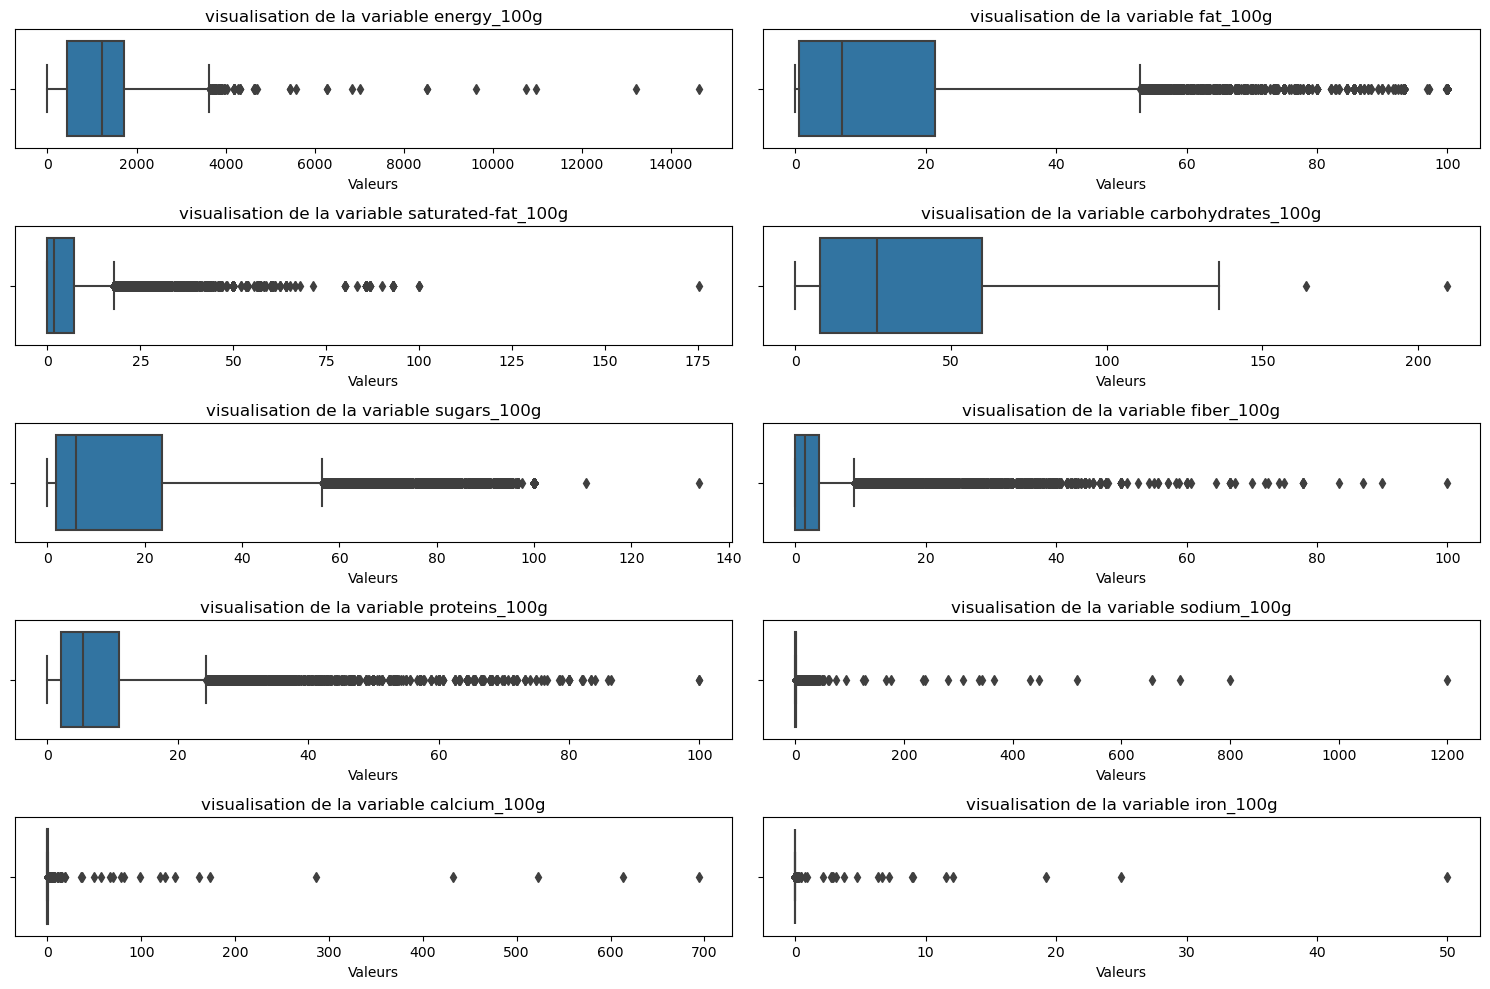

In [24]:
# Vue des graphique des valeurs aberrantes

# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=["float64"]).columns

# Création des graphiques
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f"visualisation de la variable {column}")
    plt.xlabel("Valeurs")

plt.tight_layout()
plt.show()

La majorité des variables nutritionnelles présentent des distributions asymétriques avec des valeurs aberrantes marquées.

Certaines valeurs (ex: energy_100g, fiber_100g, sodium_100g) dépassent largement les bornes physiologiquement plausibles.

Ce diagnostic confirme la nécessité de :

Définir des seuils logiques maximums.

Nettoyer les outliers avant tout entraînement de modèle ou analyse statistique.

In [25]:
data.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g
count,140381.000000,140418.000000,137008.000000,140483.000000,138721.000000,135623.000000,140147.000000,140423.000000,140837.000000,136474.000000
mean,1183.410594,13.055871,4.733301,34.522836,15.327608,2.883475,7.930423,0.568337,0.125119,0.003133
std,753.447514,15.462916,6.901817,28.309349,19.552257,4.512912,8.259670,5.835308,3.320757,0.174318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448.000000,0.500000,0.000000,8.000000,1.670000,0.000000,2.120000,0.050000,0.000000,0.000000
50%,1230.000000,7.140000,1.790000,26.320000,5.900000,1.500000,5.470000,0.278000,0.035000,0.000960
75%,1724.000000,21.430000,7.140000,60.000000,23.640000,3.600000,11.000000,0.570000,0.106000,0.002400
max,14644.000000,100.000000,175.380000,209.380000,134.000000,100.000000,100.000000,1200.000000,694.737000,50.000000


In [26]:
# défini des bornes maximales réalistes pour chaque variable nutritionnelle

# Changement de la colonne energy_100g en energy_kj
data = data.rename(columns={"energy_100g": "energy_kj"})

# Selection des limites à 100g pour chaque colonne
limites = {
    "energy_kj": (0, 3700),
    "fat_100g": (0, 100),
    "saturated-fat_100g": (0, 100),
    "carbohydrates_100g": (0, 100),
    "sugars_100g": (0, 100),
    "fiber_100g": (0, 100),
    "proteins_100g": (0, 100),
    "sodium_100g": (0, 100),
    "calcium_100g": (0, 100),
    "iron_100g": (0, 100),
}

# Suppression des valeurs impossibles
for column, (min_value, max_value) in limites.items():
    data = data[(data[column] >= min_value) & (data[column] <= max_value)]

# Remplacement des valeurs impossibles par NaN
for column, (min_value, max_value) in limites.items():
    # Remplace les valeurs en dehors des limites par NaN
    data[column] = np.where(
        (data[column] < min_value) | (data[column] > max_value),
        np.nan,
        data[column]
    )

J’ai défini des bornes maximales réalistes pour chaque variable nutritionnelle en me basant sur les connaissances biologiques et nutritionnelles.

In [27]:
data.describe()

,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g
count,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000
mean,1209.389668,13.301175,4.665560,35.496129,15.390884,2.880157,8.006138,0.514895,0.093435,0.002937
std,740.114514,15.315962,6.688406,28.194688,19.516262,4.453470,8.210725,1.610346,0.392414,0.173216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,494.000000,0.810000,0.000000,9.000000,1.640000,0.000000,2.350000,0.056000,0.000000,0.000000
50%,1264.000000,7.690000,1.790000,28.570000,5.880000,1.600000,5.710000,0.289000,0.035000,0.000980
75%,1761.000000,21.430000,7.140000,60.710000,24.320000,3.600000,11.030000,0.571000,0.100000,0.002400
max,3699.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,92.500000,82.000000,50.000000


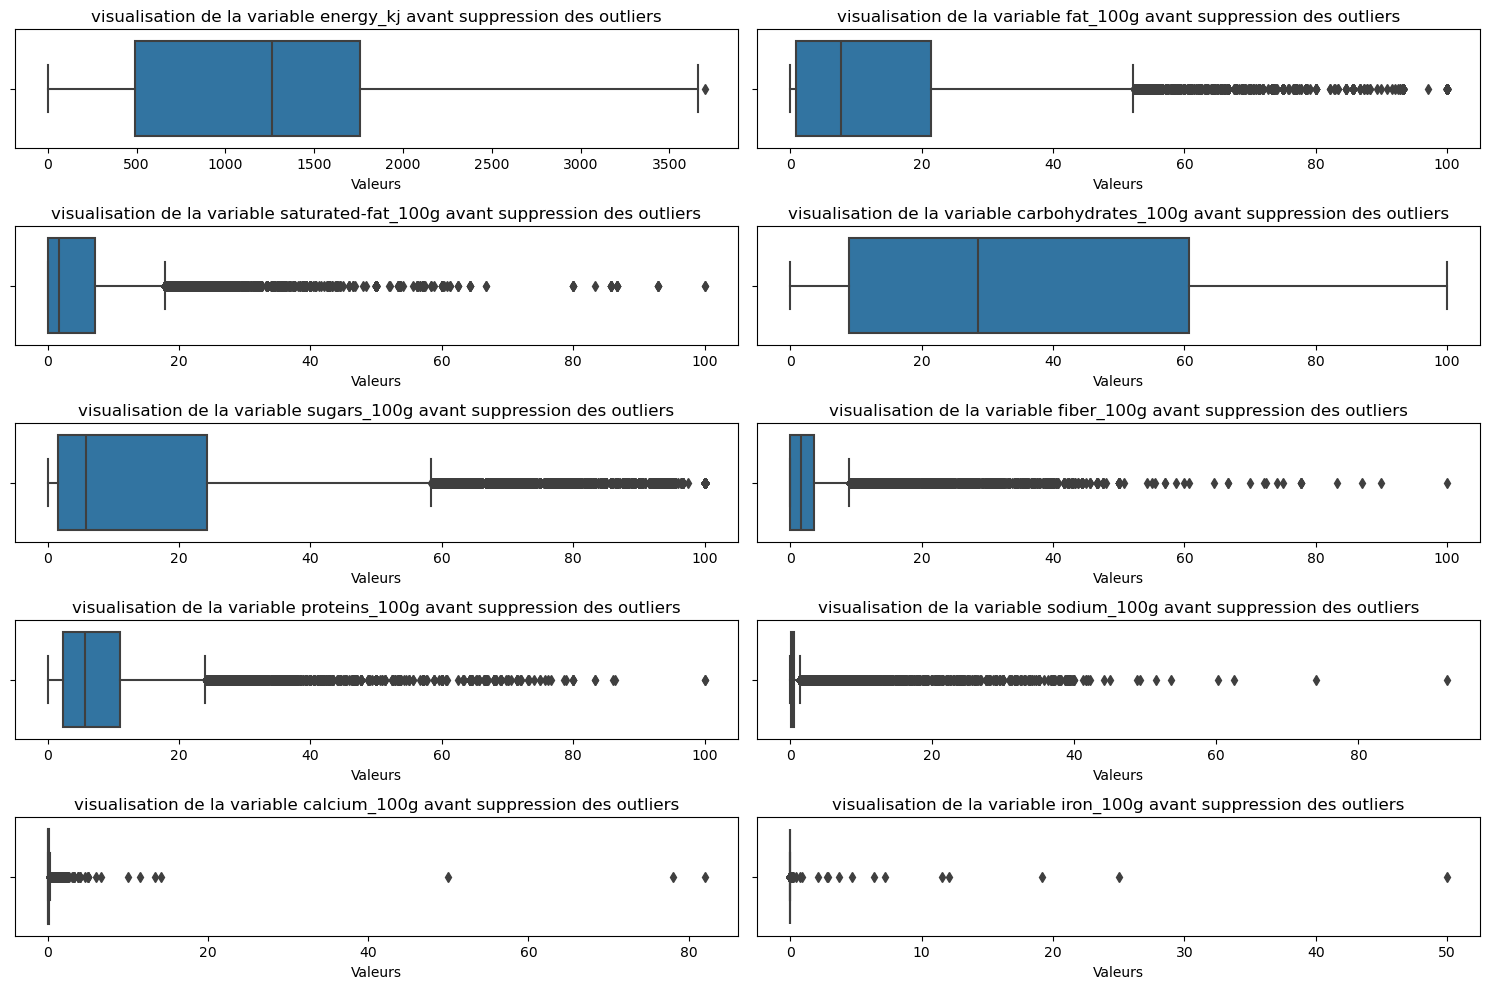

In [28]:
# Methode statistiques pour l'identification des valeurs aberrantes

# Sélection des colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=["float64"]).columns

# Création d'un boxplot avant la suppression des outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f"visualisation de la variable {column} avant suppression des outliers")
    plt.xlabel("Valeurs")
plt.tight_layout()
plt.show()

Cette image représente un ensemble de boxplots appliqués aux variables numériques (float64) de la base de données avant toute suppression de valeurs aberrantes.

Toutes les variables analysées présentent une forte asymétrie à droite avec des valeurs extrêmes.

Ces outliers, visualisés ici statistiquement, nécessitent une suppression ou une censure (winsorisation, remplacement par des bornes logiques).

Le graphique justifie pleinement l'utilisation de méthodes statistiques de nettoyage comme :

IQR (interquartile range)

Z-score

Limites physiologiquement plausibles

In [29]:
# Méthode statistique : IQR (interquartile range)
# Imputation des valeurs aberrantes en NaN

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # Premier quartile (Q1)
    Q3 = data[column].quantile(0.75)  # Troisième quartile (Q3)
    IQR = Q3 - Q1                     # Intervalle interquartile (IQR)

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remplace les valeurs en dehors des bornes par NaN
    data[column] = data[column].where((data[column] >= lower_bound) & (data[column] <= upper_bound), np.nan)

J’ai utilisé la méthode de l’intervalle interquartile (IQR) pour détecter statistiquement les outliers et les retirer. C’est une méthode fiable et robuste.

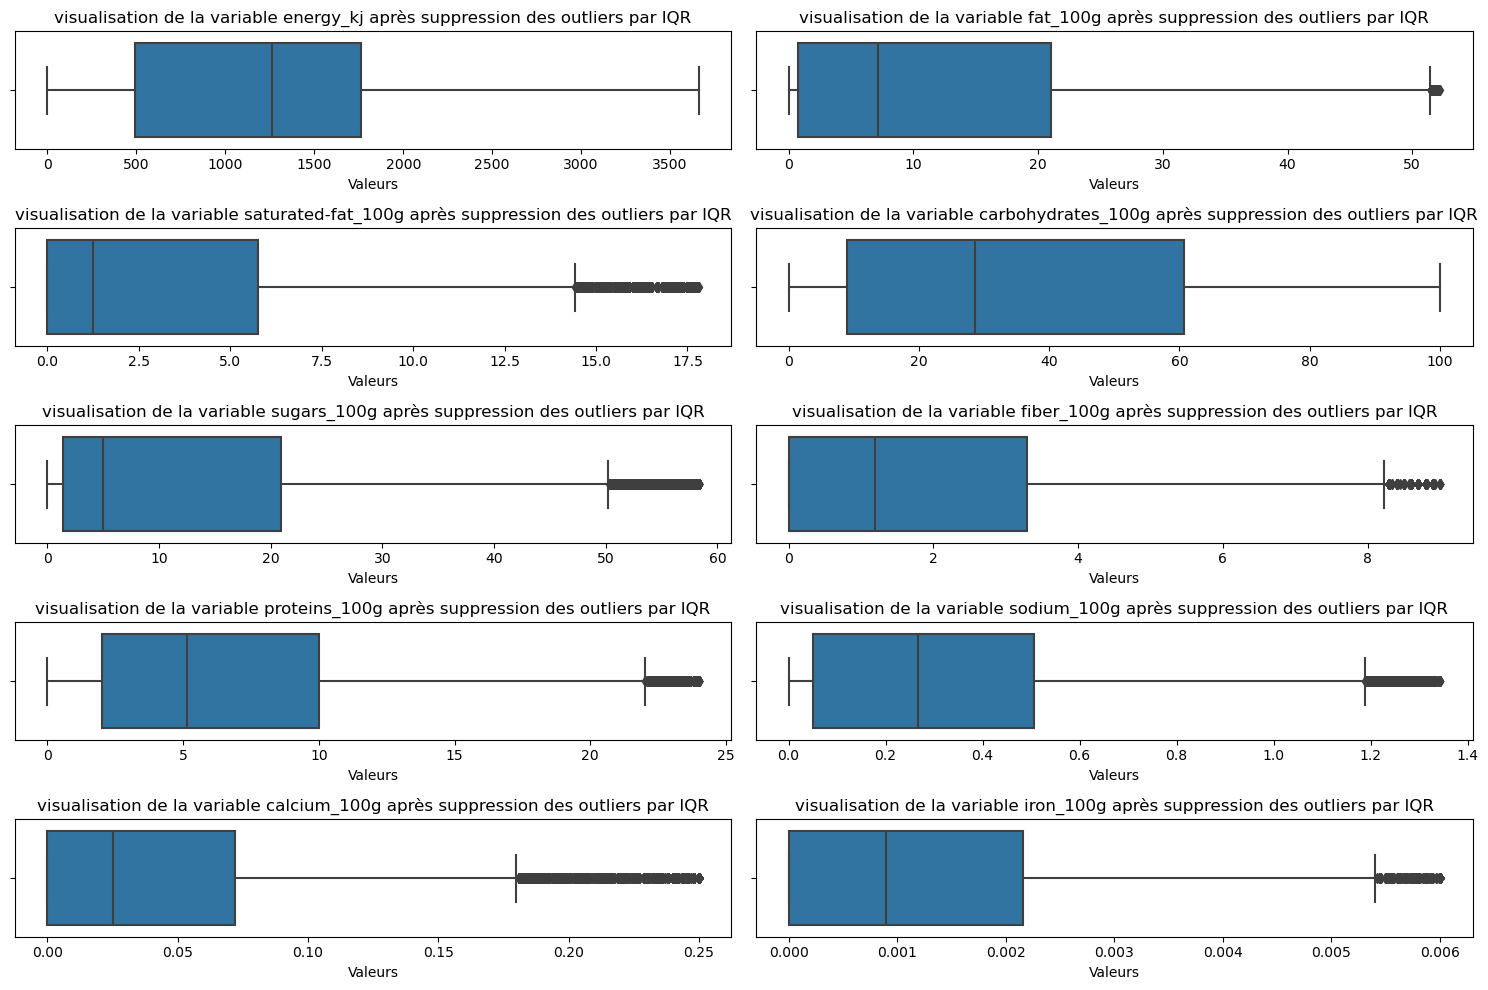

In [30]:
# Création d'un boxplot après la suppression des outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f"visualisation de la variable {column} après suppression des outliers par IQR")
    plt.xlabel("Valeurs")
plt.tight_layout()
plt.show()

La suppression par IQR a permis de :

Réduire l’impact des valeurs extrêmes.

Améliorer la lisibilité statistique des distributions.

Préparer les données à des traitements comme la PCA ou les modèles de Machine Learning.

Les distributions sont plus conformes à la réalité nutritionnelle et statistiquement robustes.

--------------------------------------------------------------------------------
on pourrait:
Comparer les résultats IQR à d’autres méthodes (winsorisation, Z-score).

Étendre le nettoyage aux variables catégorielles avec des modalités rares.

Intégrer une imputation des NaN éventuels après suppression.

In [31]:
data.describe()

,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g
count,130802.000000,127857.000000,122113.000000,130803.000000,124700.000000,120811.000000,123368.000000,124112.000000,119916.000000,125223.000000
mean,1209.370634,12.114685,3.386586,35.496129,12.669583,1.929235,6.675564,0.326265,0.047568,0.001283
std,740.085330,13.179500,4.425556,28.194688,15.346577,2.251901,6.017637,0.309406,0.057381,0.001401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,494.000000,0.760000,0.000000,9.000000,1.390000,0.000000,2.000000,0.051000,0.000000,0.000000
50%,1264.000000,7.140000,1.250000,28.570000,5.000000,1.200000,5.130000,0.266000,0.025000,0.000900
75%,1761.000000,21.050000,5.770000,60.710000,20.930000,3.300000,10.000000,0.506000,0.072000,0.002160
max,3661.000000,52.220000,17.810000,100.000000,58.330000,9.000000,24.000000,1.343000,0.250000,0.006000


Deuxieme etapes:
# Création de la fonctin) Suppressio

1	Suppression des colonnes avec > 60% NaN	== Trop peu informatives

2	Remplacement des valeurs négatives par NaN	== Incohérences nutritionnelles

3	Sélection de colonnes pertinentes (Nutri-score)	== Ciblage précis pour analyse

4	Conversion de nutrition-score-fr_100g en object	== Traitement de variable catégoriel

5	Suppression des doublons sur code == Unicité produit

6	Suppression des produits sans nom == Produits non identifiables

7	Renommage en energy_kj	== plus de Clarté

8	Filtrage par limites plausibles (ex: calcium ≤ 100) == Nettoyage logique

9	Nettoyage statistique des outliers (IQR) == Cohérence statistique (colonne numérique)nne numérique."""

In [32]:
def nettoyer_donnees_sup(data):
    # 1. Suppression des colonnes avec plus de 60% de valeurs manquantes
    perc_null = data.isnull().mean() * 100
    colonne_supp_60 = perc_null[perc_null > 60].index
    data = data.drop(columns=colonne_supp_60)

    # 2. Remplacement des valeurs négatives par NaN dans les colonnes float
    float_columns = data.select_dtypes(include=["float64"]).columns
    data[float_columns] = data[float_columns].apply(lambda x: x.where(x >= 0))

    # 3. Sélection des colonnes à conserver
    col_conserv = [
    "code", "product_name", "energy_100g", "fat_100g",
    "saturated-fat_100g", "carbohydrates_100g", "sugars_100g",
    "fiber_100g", "proteins_100g", "sodium_100g", "calcium_100g",
    "iron_100g", "nutrition_grade_fr", "nutrition-score-fr_100g"
]

    data = data[col_conserv]

    # 4. Changement du type de la colonne 'nutrition-score-fr_100g' en 'object'
    data["nutrition-score-fr_100g"] = data["nutrition-score-fr_100g"].astype("object")

    # 5. Suppression des doublons sur la colonne 'code'
    doublon_code = data["code"].duplicated().sum()
    print(f"Il y a {doublon_code} doublon(s) dans la colonne 'code'.")
    data = data.drop_duplicates(subset="code")
    ctrl_doublons = data["code"].duplicated().sum()
    print(f"Il reste {ctrl_doublons} doublon(s).")

    # 6. Suppression des lignes où 'product_name' est vide
    data = data.dropna(subset=["product_name"])

    # 7. Renommer la colonne 'energy_100g' en 'energy_kj'
    data = data.rename(columns={"energy_100g": "energy_kj"})

    # 8. Suppression des valeurs hors des limites pour la/les colonne(s)
    limites = {
    "calcium_100g": (0, 100), # Variable cible (ici calcium_100g)
}
    for column, (min_value, max_value) in limites.items():
        data = data[(data[column] >= min_value) & (data[column] <= max_value)]

    # 9. Suppression des valeurs aberrantes (outliers) pour les colonnes numériques restantes
    numeric_columns = data.select_dtypes(include=["number"]).columns
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

---------Etape 3 : Identifiez et traitez les valeurs manquantes--------

Vérifier si les valeurs manquantes le sont de manière aléatoire ou s'il y a une raison systématique derrière cela, car cela peut orienter votre choix de méthode de traitement.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130803 entries, 1 to 320768
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     130803 non-null  object 
 1   product_name             130803 non-null  object 
 2   energy_kj                130802 non-null  float64
 3   fat_100g                 127857 non-null  float64
 4   saturated-fat_100g       122113 non-null  float64
 5   carbohydrates_100g       130803 non-null  float64
 6   sugars_100g              124700 non-null  float64
 7   fiber_100g               120811 non-null  float64
 8   proteins_100g            123368 non-null  float64
 9   sodium_100g              124112 non-null  float64
 10  calcium_100g             119916 non-null  float64
 11  iron_100g                125223 non-null  float64
 12  nutrition_grade_fr       130797 non-null  object 
 13  nutrition-score-fr_100g  109582 non-null  object 
dtypes: float6

In [34]:
# Conversion du score nutritionnel en numérique

# Changement du dtype de la variable nutrition-score-fr_100g
data["nutrition-score-fr_100g"] = data["nutrition-score-fr_100g"].astype("float64")

# Calcul du taux de complétion des variables numériques
num_features = data.select_dtypes(include = ["number"]).columns
num_fill_rate = data[num_features].notnull().mean().sort_values(ascending = False)

print("Taux de remplissage des variables numériques (en %) : ")
print(round(num_fill_rate * 100, 2))

Taux de remplissage des variables numériques (en %) : 
carbohydrates_100g         100.00
energy_kj                  100.00
fat_100g                    97.75
iron_100g                   95.73
sugars_100g                 95.33
sodium_100g                 94.88
proteins_100g               94.32
saturated-fat_100g          93.36
fiber_100g                  92.36
calcium_100g                91.68
nutrition-score-fr_100g     83.78
dtype: float64


<!-- data["nutrition-score-fr_100g"] = data["nutrition-score-fr_100g"].astype("float64") -->

Initialement considéré comme texte, mais il représente une valeur continue utile pour la modélisation et la normalisation.

<!-- num_fill_rate = data[num_features].notnull().mean().sort_values(ascending = False) -->

la majorité est bien remplie (>90%).

J’ai évalué le taux de complétion de chaque variable numérique. Cela m’a aidé à identifier quelles colonnes étaient utilisables sans trop de traitement, et lesquelles nécessitaient une imputation

In [35]:
# Utilisation de KNNImputer avec un nombre de voisins spécifié (k = 5 par défaut)
imputer = KNNImputer()

# Imputation des valeurs manquantes dans les colonnes numériques
# imputer.fit_transform renvoie un tableau Numpy modifiant directement les colonnes de "data"
data[num_features] = imputer.fit_transform(data[num_features])

# Contrôle d'imputation des valeurs manquantes
print(data[num_features].isnull().sum())

energy_kj                  0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
sodium_100g                0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
dtype: int64


Pour les variables numériques, j’ai utilisé la méthode KNNImputer, qui remplit les valeurs manquantes en s’appuyant sur les voisins les plus similaires dans l’espace des autres variables."

KNNImputer comble les valeurs manquantes en se basant sur les observations les plus proches (k=5 par défaut).

Plus intelligent qu’une simple moyenne : il préserve les relations entre les variables.

<Axes: >

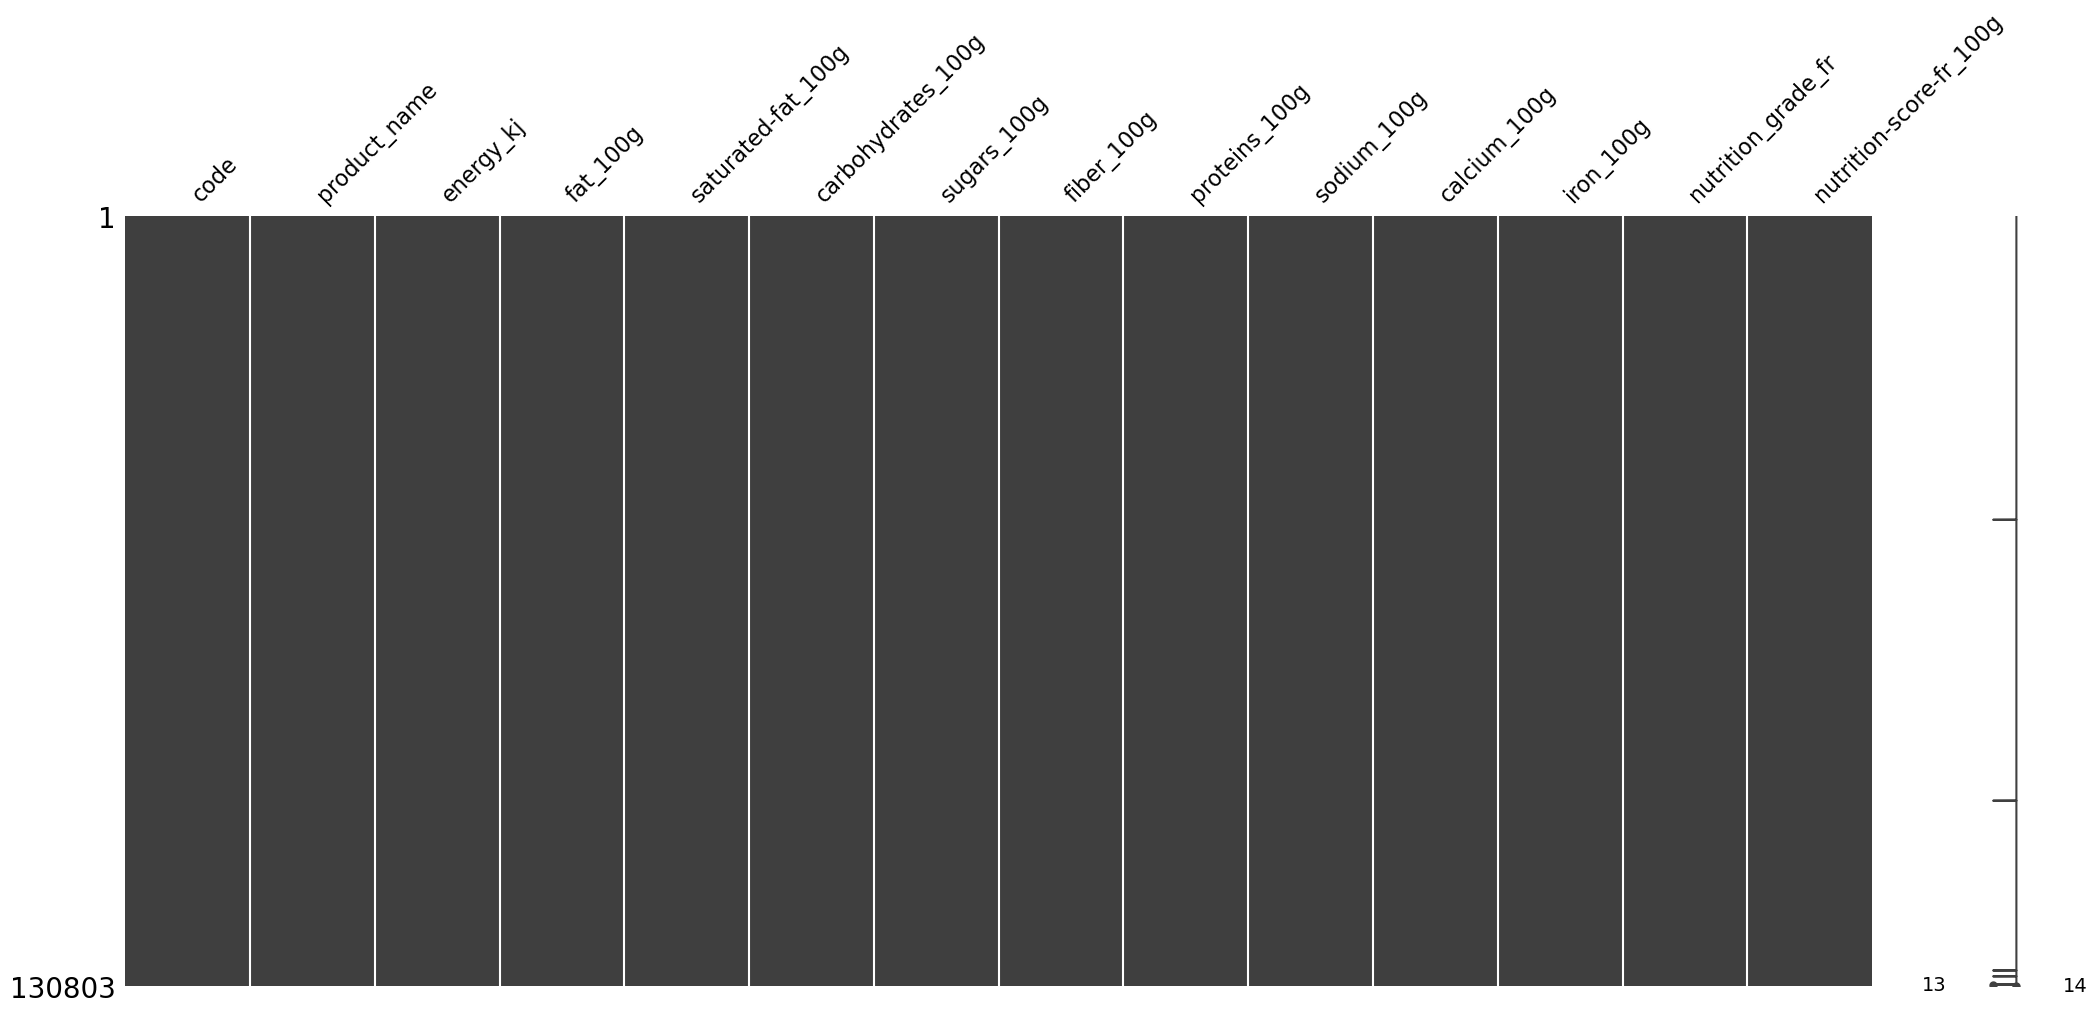

In [36]:
msno.matrix(data)

In [37]:
valeurs_uniques = data['nutrition_grade_fr'].unique()
print(valeurs_uniques)

['d' 'b' 'c' 'a' 'e' nan]


In [38]:
# Création d'un sous-ensemble avec les colonnes pertinentes
subset = data[["nutrition_grade_fr"] + list(num_features)]

# Séparation des données avec ou sans valeurs manquantes de "nutrition_grade_fr"
data_with_target = subset.dropna(subset=["nutrition_grade_fr"])
data_missing_target = subset[subset["nutrition_grade_fr"].isnull()]

# Définition des variables et target après l'imputation
X = data_with_target[num_features]
y = data_with_target["nutrition_grade_fr"]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline avec standardisation et régression logistique
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver="saga"))
pipeline.fit(X_train, y_train)

# Prédiction pour les valeurs manquantes de "nutrition_grade_fr"
predicted_values = pipeline.predict(data_missing_target[num_features])

# Remplacement des valeurs manquantes
data.loc[data["nutrition_grade_fr"].isnull(), "nutrition_grade_fr"] = predicted_values

# Contrôle des résultats
print(data["nutrition_grade_fr"].isnull().sum())

0


La variable nutrition_grade_fr étant une cible importante mais parfois manquante, j’ai utilisé une approche supervisée. J’ai entraîné un modèle de régression logistique sur les produits avec note connue, puis prédit celle des produits sans note. Cela m’a permis de conserver plus de données.

In [39]:
valeurs_uniques = data['nutrition_grade_fr'].unique()
print(valeurs_uniques)

['d' 'b' 'c' 'a' 'e']


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130803 entries, 1 to 320768
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     130803 non-null  object 
 1   product_name             130803 non-null  object 
 2   energy_kj                130803 non-null  float64
 3   fat_100g                 130803 non-null  float64
 4   saturated-fat_100g       130803 non-null  float64
 5   carbohydrates_100g       130803 non-null  float64
 6   sugars_100g              130803 non-null  float64
 7   fiber_100g               130803 non-null  float64
 8   proteins_100g            130803 non-null  float64
 9   sodium_100g              130803 non-null  float64
 10  calcium_100g             130803 non-null  float64
 11  iron_100g                130803 non-null  float64
 12  nutrition_grade_fr       130803 non-null  object 
 13  nutrition-score-fr_100g  130803 non-null  float64
dtypes: float6

Valeurs aberrantes == Nettoyées par limites + IQR
Valeurs manquantes numériques == Imputées par KNN
Valeurs manquantes cibles == Complétées par prédiction
Dataset final == 130 803 lignes, 14 colonnes

Grâce à ces différentes étapes de nettoyage et d’imputation, j’ai maintenant un dataset cohérent, complet, sans outliers ni doublons, prêt pour l’analyse exploratoire, la PCA ou un modèle prédictif.

In [41]:
target_c = data.copy()

In [42]:
target_cible = target_c.loc[:, ["code", "calcium_100g"]]